![me](img/me.png)

## My Professional LittleBig Data 😉

With [21 years of experience](https://www.linkedin.com/in/inigojimenez) working on multiple projects, it was very difficult for me to teach in an agile, clear and concise way all relevant aspects of my professional life.

As a learning method in the world of BigData, I have dumped the information of 50 relevant projects in which I have been working and here is the result of exploiting that information through this Jupyter Notebook. Enjoy it 👌🏼

"Live as if you were to die tomorrow. Learn as if you were to live forever" - Mahatma Gandhi

In [311]:
#Importamos las librerías que usaremos en el proyecto
import pandas as pd
import plotly.express as px
from itertools import combinations
from collections import Counter
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import wordcloud


In [312]:
#cargamos el fichero de conexiones a un dataframe
projects = pd.read_excel('data/projects.xlsx')


In [313]:
#para trabajar correctamente transformamos el campo Date en un campo fecha
projects['Date'] = pd.to_datetime(projects['Date'])

In [314]:
# añadimos una columna Año-Mes para hacer agrupaciones por mes del contacto
projects['mes_anio'] = pd.to_datetime(projects['Date']).dt.to_period('M').astype(str)


## Visualizations using plotty xpress

We are going to show several graphs to analyze my LittleBig Data

### 1. Projects by Job Title 👨‍🏫

Role I played in the projects

In [328]:
count = Counter()
for row in projects['JobTitle']:
    try:
        row_list = row.split(";")
    except:
        pass
    count.update(Counter(combinations(row_list, 1)))
dic = dict()    
for key,value in count.most_common(10):
    dic[key[0]] = value
jobTitle = pd.DataFrame()
jobTitle["JobTitle"] = dic.keys()
jobTitle["Count"] = dic.values()
jobTitle["Count %"] = jobTitle["Count"].apply(lambda x: (x*100)/projects.shape[0])

fig1 = px.treemap(jobTitle[:100], path=["JobTitle"], values="Count", hover_data=["JobTitle","Count"], 
                  color="Count", 
                  template="plotly_dark",
                   labels={"Count":"Projects", "JobTitle":"Job Title"})
                   
fig1.update_layout(uniformtext=dict(minsize=15, mode='show'))
fig1.show()

### 2. My Popular Languages 🎩

They are not all who are, nor are all who are 🙌

In [316]:
count = Counter()
for row in projects['Languages']:
    try:
        row_list = row.split(";")
    except:
        pass
    count.update(Counter(combinations(row_list, 1)))
dic = dict()    
for key,value in count.most_common(10):
    dic[key[0]] = value
lang = pd.DataFrame()
lang["Language"] = dic.keys()
lang["Count"] = dic.values()
lang["Count %"] = lang["Count"].apply(lambda x: (x*100)/projects.shape[0])


fig2 = go.Figure()
fig2.add_trace(go.Bar(x=lang['Language'],
                y=lang['Count %'],
                name='Most Used Programming Language',
                marker_color='rgb(55, 83, 109)'
                ))

fig2.update_layout(
    title = "My Popular Programming Languages",
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Count %',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0.6,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)',
        
    ),
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1,
    title_x=0.5,
    autosize = True,
)
fig2.show()

### 3. All in One ✌️

This is my day to day.

In [317]:
count = Counter()
for row in projects['IDE']:
    try:
        row_list = row.split(";")
    except:
        pass
    count.update(Counter(combinations(row_list, 1)))
dic = dict()    
for key,value in count.most_common(15):
    if key[0]!="":
        dic[key[0]] = value
mooc_ide = pd.DataFrame()
mooc_ide["IDE Name"] = dic.keys()
mooc_ide["Count"] = dic.values()
mooc_ide["Count %"] = mooc_ide["Count"].apply(lambda x: (x*100)/projects.shape[0])
mooc_ide['IDE Name'] = mooc_ide["IDE Name"].apply(lambda x: x.split("(")[0].strip())

count = Counter()
for row in projects['Platforms']:
    try:
        row_list = row.split(";")
    except:
        pass
    count.update(Counter(combinations(row_list, 1)))
dic = dict()    
for key,value in count.most_common(15):
    if key[0]!="":
        dic[key[0]] = value
deploy_platform = pd.DataFrame()
deploy_platform["Platform Name"] = dic.keys()
deploy_platform["Count"] = dic.values()
deploy_platform["Count %"] = deploy_platform["Count"].apply(lambda x: (x*100)/projects.shape[0])

count = Counter()
for row in projects['DB']:
    try:
        row_list = row.split(";")
    except:
        pass
    count.update(Counter(combinations(row_list, 1)))
dic = dict()    
for key,value in count.most_common(15):
    if key[0]!="":
        dic[key[0]] = value
db_engine = pd.DataFrame()
db_engine["DB Engine Name"] = dic.keys()
db_engine["Count"] = dic.values()
db_engine["Count %"] = db_engine["Count"].apply(lambda x: (x*100)/projects.shape[0])

fig3 = make_subplots(
    rows=3, cols=1,
    subplot_titles=("IDEs", "Platforms","DB Engines"),
    shared_xaxes= False)

fig3.add_trace(go.Bar(x=mooc_ide['Count %'][:5][::-1], y=mooc_ide['IDE Name'][:5][::-1], orientation='h'),
              row=1, col=1)

fig3.add_trace(go.Bar(x=deploy_platform['Count %'][:5][::-1], y=deploy_platform['Platform Name'][:5][::-1], orientation='h'),
              row=2, col=1)

fig3.add_trace(go.Bar(x=db_engine['Count %'][:5][::-1], y=db_engine['DB Engine Name'][:5][::-1], orientation='h'),
              row=3, col=1)

fig3.update_layout(height=600, 
                  width=800, 
                  title_text="My Popular Environments", 
                  showlegend=False, 
                  title_x=0.5, 
                  template="seaborn")

fig3.show()

### 4. My Initiatives 🙋‍♂️


I am a person with a lot of initiative and creativity. 

If something does not exist to be able to solve a problem or improve a process, then I create it.

In [318]:
fig4 = px.pie(data_frame=projects, 
             names='TypeOfJob', 
             color_discrete_sequence=px.colors.sequential.Teal_r[2:], 
             labels={"TypeOfJob":"Initiative"}, 
             title = "Initiative Type", 
             template="seaborn"
            )
fig4.update_layout(
    title_x=0.5,
    autosize = True
)
fig4.update_traces(textposition='inside', 
                  textinfo='percent+label')

### 5. My Jobs 🪑



This is where I have had the opportunity to share and learn from others in the different projects.

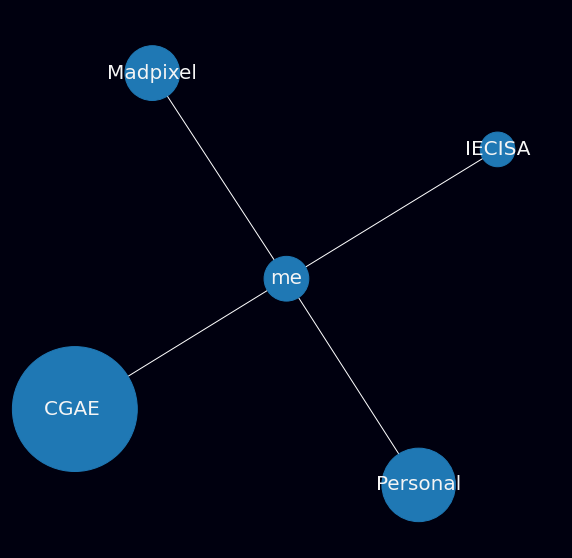

In [319]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from pyvis import network as net

# initialize graph
G=nx.Graph()


df_company = projects["Company"].value_counts().reset_index()
df_company.columns = ["Company", "Count"]
df_company = df_company.sort_values(by="Count", ascending=False)
#df_company.head(10)

G.add_node('me', color='red',size=2000, font_color='white') # intialize yourself as central
df_company_reduced = df_company.loc[df_company['Count']>=1]
df_company_reduced.head()

# use iterrows tp iterate through the data frame
for _, row in df_company_reduced.iterrows():

  # store company name and count
  company = row['Company']
  count = row['Count']

  title = f"<b>{company}</b> – {count}"
  positions = set([x for x in projects[company == projects['Company']]['ProjectName']])
  positions = ''.join('<li>{}</li>'.format(x) for x in positions)

  position_list = f"<ul>{positions}</ul>"
  hover_info = title + position_list

  G.add_node(company,color='red',size=count*600, title=hover_info)

  G.add_edge('me', company, color='grey')


node_color=[]
node_size=[]
for node in G.nodes():
    color = G.nodes[node]['color']
    node_color.append(color)
    size = G.nodes[node]['size']
    node_size.append(size)

#Draw the network digram assigning node_color and node_size using the lists established in the previous step and lavish in your new found network diagram greatness.
fig5 = plt.figure(figsize=(10,10))
plt.margins(x=0.1, y=0.1)
nx.draw(G, with_labels=True, node_size=node_size, edge_color='white', font_size=20, font_color="whitesmoke")
fig5.set_facecolor("#00000F")

### 5. Word cloud

This is me defined with a word cloud.

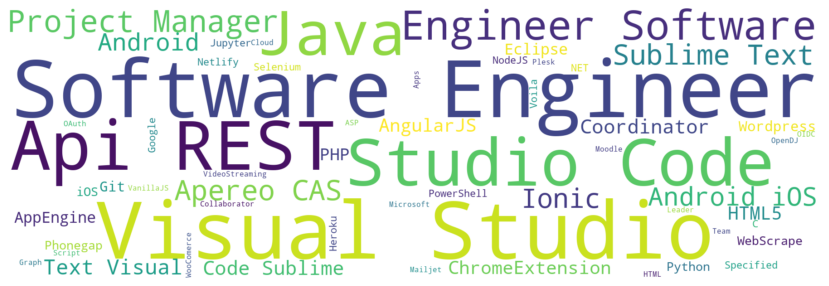

In [323]:
text = list()
cols = ['JobTitle', 'Languages','IDE','Platforms']

for col in cols:
    for row in projects[col]:
        try:
            row_list = (" ".join(row.split())).split(";")
        except:
            pass
        text =  text + row_list

text = " ".join(text)

wc = wordcloud.WordCloud(background_color="white", 
                         max_words=150, 
                         width=1800, 
                         height=600, 
                         stopwords=wordcloud.STOPWORDS).generate(text)

plt.figure(figsize = (15,5)) 
plt.imshow(wc, interpolation='bilinear') 
plt.axis("off") 
plt.show()

And these are all the companies I've worked with.

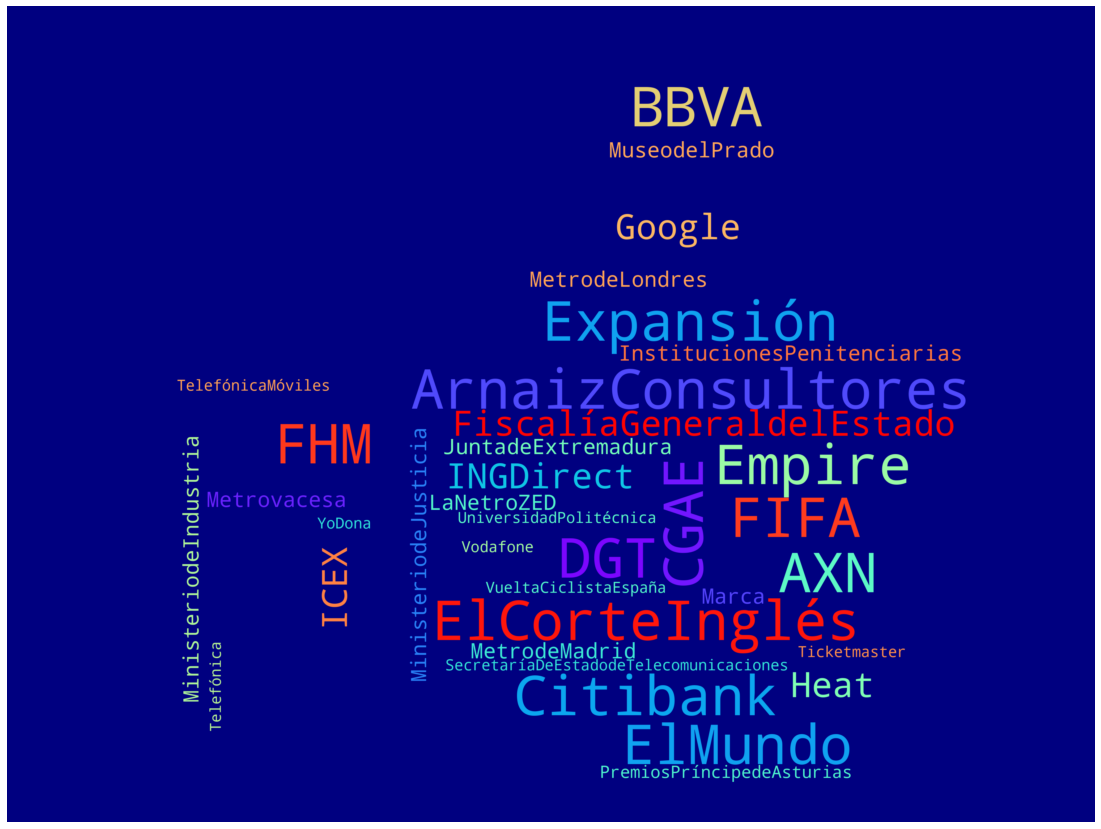

In [324]:
# Import packages
import numpy as np
from PIL import Image
companies=["ArnaizConsultores","AXN","BBVA","Citibank","CGAE","DGT","ElCorteInglés","ElMundo","Empire","Expansión","FHM","FIFA","FiscalíaGeneraldelEstado","Google","Heat","ICEX","INGDirect","InstitucionesPenitenciarias","JuntadeExtremadura","LaNetroZED","Marca","MetrodeLondres","MetrodeMadrid","Metrovacesa","MinisteriodeIndustria","MinisteriodeJusticia","MuseodelPrado","PremiosPríncipedeAsturias","SecretaríaDeEstadodeTelecomunicaciones","Telefónica","TelefónicaMóviles","Ticketmaster","UniversidadPolitécnica","Vodafone","VueltaCiclistaEspaña","YoDona"]
text = list()
text = " ".join(companies)
# Import image to np.array
mask = np.array(Image.open('img/upvote.png'))

wc = wordcloud.WordCloud(background_color='navy', colormap='rainbow', collocations=False, 
                         max_words=150, 
                        width = 3000, height = 2000,
                        random_state=1,
                           mask=mask).generate(text)

plt.figure(figsize = (45,15)) 
plt.imshow(wc, interpolation='bilinear') 
plt.axis("off") 
plt.show()

Made with ❤️ by [Iñigo Jiménez](https://www.linkedin.com/in/inigojimenez)